<a href="https://colab.research.google.com/github/Psychohistorian11/AnalisisNumerico/blob/main/Clases/EjercicioPracticoClase4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sp
import numpy as np
from math import factorial
x = sp.symbols("x")


def Taylor(f,x0,n): #Sumatoria
  p = 0
  for k in range(n+1):
    df=sp.diff(f,x,k)
    df=sp.lambdify(x,df)
    co=df(x0)*(x-x0)**k/factorial(k)
    p = p + co

  return p

f = sp.exp(2*x)*sp.cos(2*x)
x0 = 0
print("Polinomio: ", Taylor(f,0,3))


def cota(f,px,x0,n):
  M=max(x0,px)
  m=min(x0,px)
  w=np.linspace(m,M,1000)
  dfn = sp.lambdify(x,sp.diff(f,x,n+1))
  ma = np.max(np.abs(dfn(w)))
  c = ma*(px-x0)**(n+1)/factorial(n+1)
  return c

print("cota: ", cota(f,0.5,x0,3))



Polinomio:  -2.66666666666667*x**3 + 2.0*x + 1.0
cota:  0.25848049397264544


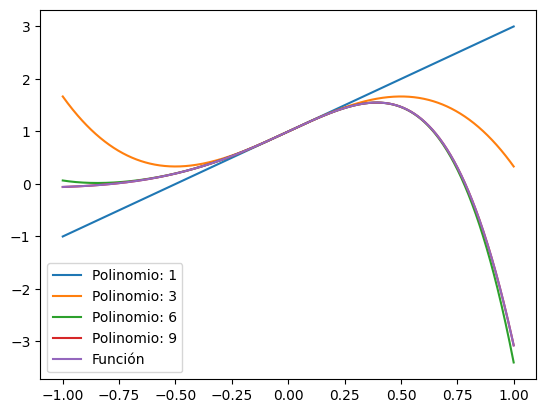

In [ ]:
import matplotlib.pyplot as plt

f = sp.exp(2*x)*sp.cos(2*x)
de = 1
w = np.linspace(x0-de,x0+ de, 1000)

for i in [1,3,6,9]:
  p = Taylor(f,x0,i)
  p= sp.lambdify(x,p)
  plt.plot(w,p(w), label="Polinomio: "+str(i))
  plt.legend()

f=sp.lambdify(x,f)
plt.plot(w,f(w), label="Función")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import sympy as spy
x = spy.symbols("x")

F = spy.exp(2*x)*spy.cos(2*x)
X = [0.5,0.75,5]
d = []


for i in X:
    P = Taylor(f,x0,6)
    P = spy.lambdify(x,P)
    F_eval = spy.lambdify(x, F)
    d.append([i, F_eval(i), P(i), np.abs(F_eval(i) - P(i))])

d = pd.DataFrame(data=d)
print(d)

      0             1            2             3
0  0.50      1.468694     1.466667      0.002027
1  0.75      0.317022     0.278125      0.038897
2  5.00 -18481.780335 -5322.333333  13159.447001


### Problema

Determine el sexto polinomio de Taylor $P_{6}(x)$ para la función $f(x) = 2xsin(2x) - (x-3)^{2}$ en torno a $x_{0} = \frac{\pi}{4}$

* Use $P_{6}(\frac{\pi}{2})$ para aproximar $f(\frac{\pi}{2})$

* Determine una cota superior para el error $|f(\frac{\pi}{2}) - P_{6}(\frac{\pi}{2})|$ por medio de la fórmula del error, es decir $R_{6}(\frac{\pi}{2})$

* Aproxime $f'(\frac{\pi}{2})$ usando $P_{6}'(\frac{\pi}{2})$ y
 calcule el error abosuluto y relativo.

* Grafique el polinomio versus la función.

Este es el Polinomio de grado 6:  6.4292036732051*x - 0.139626340159546*(x - 0.785398163397448)**6 + 1.33333333333333*(x - 0.785398163397448)**5 + 1.0471975511966*(x - 0.785398163397448)**4 - 4.0*(x - 0.785398163397448)**3 - 4.14159265358979*(x - 0.785398163397448)**2 - 8.38314972493191
derivada
P(x) -2.0126610874362054 g(x) -2.0426231395029597 ErrorA= 0.029962052066754286
Cota:  0.03277227894723081
dp6(x) -3.16290878189286 dg(x) -3.42477796076938
Graficas: 


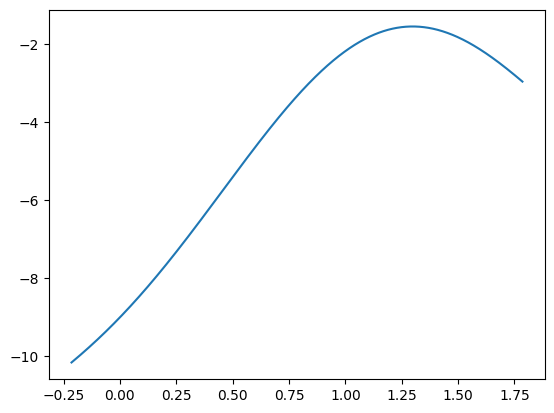

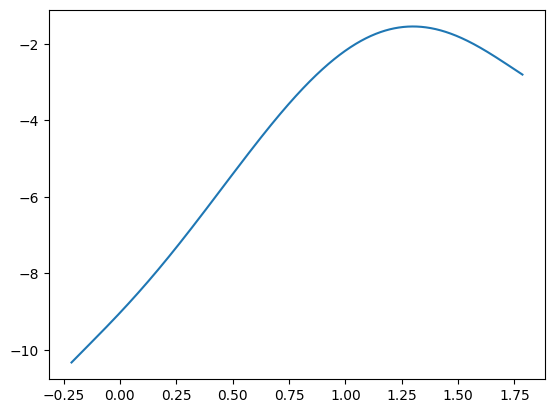

In [20]:
import sympy as spy
import numpy as np
import matplotlib.pyplot as plt

x = spy.symbols("x")
y = spy.symbols("y")

g = 2*x*spy.sin(2*x)-(x-3)**2 #Función
xo = np.pi/4 #Punto
P6 = Taylor(g,xo,6) #Aquí se creo un polinomio de la función de grado 6 como pidio el enunciado.


P6G = spy.lambdify(x, P6)
G = spy.lambdify(x, g)

print("Este es el Polinomio de grado 6: ",P6)

print("derivada")
dP6 = spy.diff(P6,x)
dg = spy.diff(g,x)


print("P(x)", P6G(np.pi/2),"g(x)",G(np.pi/2) , "ErrorA=", np.abs(P6G(np.pi/2)-G(np.pi/2)))

print("Cota: ", cota(g, np.pi/2,xo,6))

print("dp6(x)", dP6.subs(x,np.pi/2), "dg(x)", dg.subs(x,np.pi/2))

print("Graficas: ")

de = 1
w = np.linspace(xo-de,xo+ de, 1000)
z = np.linspace(xo-de,xo+ de, 1000)


plt.plot(w,G(w), label="Función: ")
plt.show()

plt.plot(z,P6G(z), label="Polinomio: ")
plt.show()

